In [2]:
import numpy as np

# Модель "Хищник-Жертва"

In [3]:
var('y1, y2') #переменные

t = np.linspace(0,7,71) #точки времени
ic = np.linspace(1.0, 3.0, 11) #список чисел для перебора начальной инициализации
y0 = [2, 1] #начальная инициализация
a,b,c,d = 3,3,1,1 #начальные значения в нашей функции

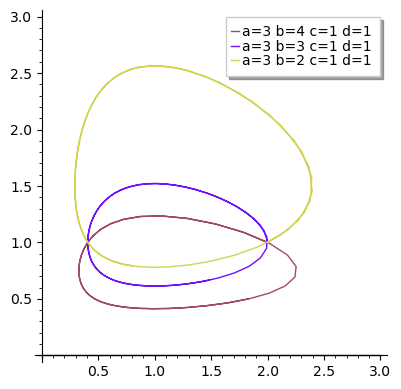

In [4]:
g = plot(0, (x, 0, 3), color='black')  #объект для графика
for b in range(4,1,-1):
    st = f"a={a} b={b} c={c} d={d}" #строка для описания на графике
    rgb = (randint(0,256)/256, randint(0,256)/256, randint(0,256)/256) #tuple из 3 чисел для rgb
    f = [y1*(a-b*y2),y2*(-c+d*y1)] #задаем функцию
    sol = desolve_odeint(f, y0, t, dvars=[y1, y2]) #получаем решение ОДУ
    g += line(sol, rgbcolor=rgb, legend_label=st) #прибавляем объект для графика
g.show(xmin=0, xmax=3, ymin=0, ymax=3, aspect_ratio=1) #отображаем график

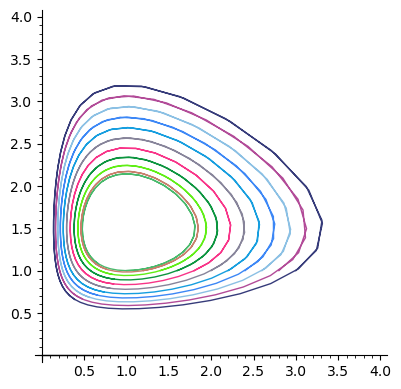

In [5]:
g = plot(0, (x, 0, 3), color='black')  #объект для графика
for r in ic:
    y0 = [r, 1.0] #начальная инициализация
    rgb = (randint(0,256)/256, randint(0,256)/256, randint(0,256)/256) #tuple из 3 чисел для rgb
    f = [y1*(a-b*y2),y2*(-c+d*y1)] #задаем функцию
    sol = desolve_odeint(f, y0, t, dvars=[y1, y2]) #получаем решение ОДУ
    g += line(sol, rgbcolor=rgb) #прибавляем объект для графика
g.show(xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1) #отображаем график

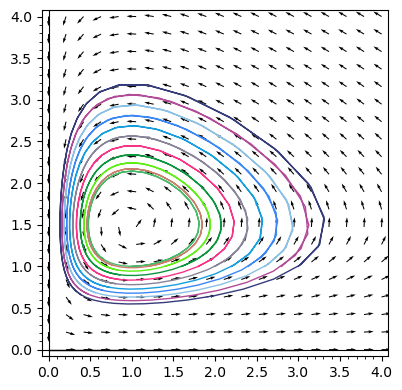

In [6]:
f1 = y1*(a-b*y2) #первая часть функции
f2 = y2*(-c+d*y1) #вторая часть функции
f_tup = (f1 / sqrt(f1**2 + f2**2), f2 / sqrt(f1**2 + f2**2)) #нормированная функция
g += plot_vector_field(f_tup,(y1,0,4),(y2,0,4)) #прибавляем к графику объект из векторного поля
g.show(xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1) #отображаем график

# Падение тела брошенного под углом к горизонту

In [7]:
var("p1, p2, p3, p4") #переменные

t = np.linspace(0,7,300) #точки времени
alpha = np.pi/4 #угол
v0 = 10.0 #начальная скорость
y0 = [0, v0*np.cos(alpha), 0, v0*np.sin(alpha)] #начальная инициализация
k = 0.01 #сопротивление среды
G = 9.81 #ускорение свободного падения

In [8]:
f = [p2, -k*p2*sqrt(p2**2+p4**2), p4, -k*p2*sqrt(p2**2+p4**2)-G] #функция
sol = desolve_odeint(f, y0, t, dvars=[p1, p2, p3, p4]) #решение ОДУ

In [9]:
Y = np.array(sol) #получаем ndarray
plot_arr = np.vstack((Y[:, 0], Y[:, 2])).T #получение пар значений
g = line(plot_arr) #объект для графика

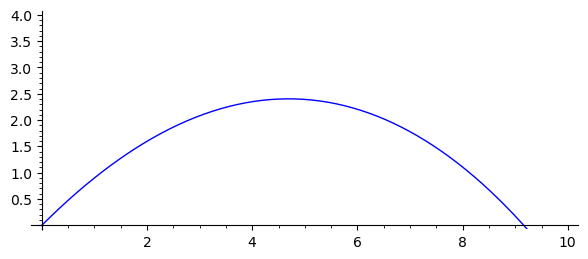

In [10]:
g.show(xmin=0, xmax=10, ymin=0, ymax=4, aspect_ratio=1) #отображение графика

In [11]:
g = plot(0, (x, 0, 3), color='black')  #объект для графика
K = [0.1, 0.2, 0.3, 0.5] #значения сопротивлений среды
for k in K:
    rgb = (randint(0,256)/256, randint(0,256)/256, randint(0,256)/256) #tuple из 3 чисел для rgb
    f = [p2, -k*p2*sqrt(p2**2+p4**2), p4, -k*p2*sqrt(p2**2+p4**2)-G] #функция
    sol = desolve_odeint(f, y0, t, dvars=[p1, p2, p3, p4]) #решение ОДУ
    Y = np.array(sol) #получаем ndarray
    plot_arr = np.vstack((Y[:, 0], Y[:, 2])).T #получение пар значений
    g += line(plot_arr, rgbcolor=rgb) #прибавляем объект для графика

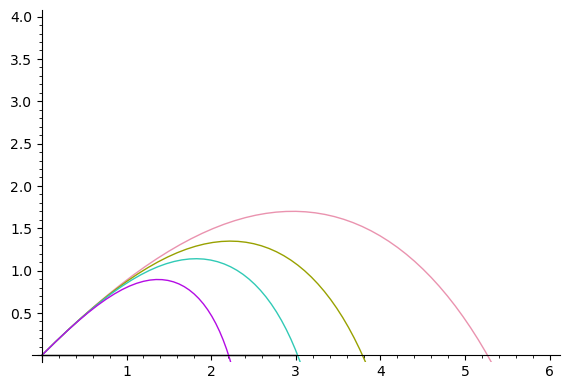

In [12]:
g.show(xmin=0, xmax=6, ymin=0, ymax=4, aspect_ratio=1) #отображение графика